## The problem
$\|w\|_1\to\min$ s.t. $\|wX-y\|_2^2\leq\varepsilon$

The Lagrangian is:
$$
L(w, \lambda)=\|w\|_1+\lambda(\|wX-y\|_2^2-\varepsilon)
$$

Gradients are:
$$
\frac{\partial L}{\partial w}=\frac{\partial}{\partial w} \left[\|w\|_1+\lambda \|wX-y\|_2^2\right]
$$

and 
$$
\frac{\partial L}{\partial \lambda}=\|wX-y\|_2^2-\varepsilon
$$

They correspond to minimizing functions $L(w, \lambda)$ over $w$ and $-L(w, \lambda)$ over $\lambda$.

In [165]:
import torch
import gin
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

In [166]:
device = torch.device('cuda')

In [167]:
data = torch.randn(10, 100).to(device).detach()

In [168]:
y = (data[:, 0] + data[:, 1] + data[:, 2] + data[:, -1]).detach()

In [169]:
w = torch.autograd.Variable(torch.randn(100).to(device), requires_grad=True)
lam = torch.autograd.Variable(torch.rand(1).to(device), requires_grad=True)

In [170]:
def fit():
    return ((y - w @ data.T).pow(2).sum(0))

def sp():
#     return torch.tensor(0.0, dtype=torch.float32, device=device, requires_grad=False)#w.abs().sum()
    return w.abs().sum()

def lagrangian(sp_, fit_):
    return sp_ + lam.mean() * (fit_ - 0.001)

In [171]:
lam.mean(), fit().item(), sp().item(), lagrangian(sp(), fit())

(tensor(0.9362, device='cuda:0', grad_fn=<MeanBackward0>),
 1655.34716796875,
 77.37570190429688,
 tensor(1627.1544, device='cuda:0', grad_fn=<AddBackward0>))

In [172]:
opt_primal = torch.optim.Adam([w], lr=1e-3)
opt_dual = torch.optim.Adam([lam], lr=1e-3)

In [173]:
lags = []
fits = []
sps = []
lams = []

In [199]:
for i in tqdm(range(10000)):
    opt_primal.zero_grad()
    sp_ = sp()
    fit_ = fit()
    l = lagrangian(sp_, fit_)
    l.backward()
    opt_primal.step()
    
    lags.append(l.item())
    fits.append(fit_.item())
    sps.append(sp_.item())
    lams.append(lam.item())

    
    opt_dual.zero_grad()
    sp_ = sp()
    fit_ = fit()
    l = -lagrangian(sp_, fit_)
    l.backward()
    opt_dual.step()
        
    lam.data[:] = torch.clamp(lam.data, 0, 100000)

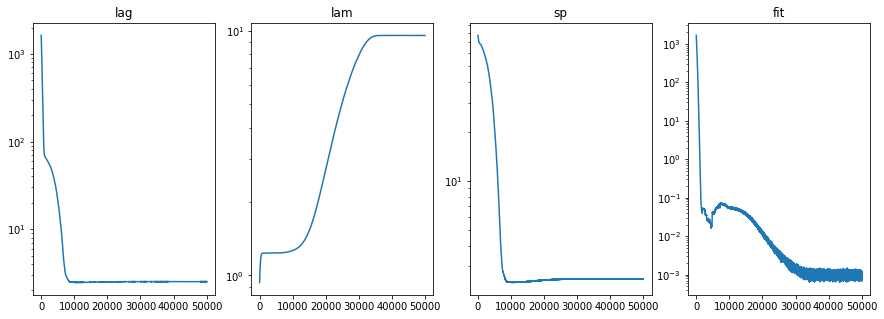

In [200]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('lag')
plt.plot(lags)
plt.yscale('log')

plt.subplot(1, 4, 2)
plt.title('lam')
plt.plot(lams)
plt.yscale('log')

plt.subplot(1, 4, 3)
plt.title('sp')
plt.plot(sps)
plt.yscale('log')

plt.subplot(1, 4, 4)
plt.title('fit')
plt.plot(fits)
plt.yscale('log')

In [201]:
import numpy as np

<AxesSubplot:>

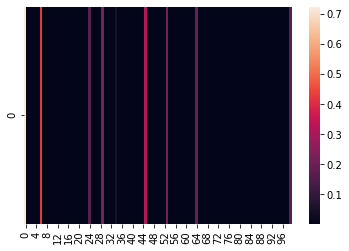

In [202]:
sns.heatmap(np.abs(w.cpu().detach().numpy().reshape(1, -1)))

In [203]:
sps[-1]

2.5241036415100098

In [204]:
w.grad

tensor([ 0.2015,  0.0080, -0.0436, -0.0488,  0.0470,  0.0581, -0.0379, -2.0281,
         2.0508, -2.1417, -0.0921, -1.9058, -2.0150,  0.1533, -0.0562, -0.0927,
         0.0942, -0.0297, -1.9154, -0.0168,  0.0522,  2.0590, -0.0677, -2.0056,
        -0.0993, -0.0440, -0.0695, -0.0727, -0.0450, -0.0580,  1.8718, -1.9253,
        -0.0611,  2.0430, -0.0043,  0.0758, -0.0959, -0.0320,  0.0531, -2.0485,
        -0.1120, -1.9577,  2.0780, -0.1425,  0.1154,  0.0545, -0.1242, -1.9522,
        -2.1032, -2.0107,  0.1020,  0.1101, -0.0720, -0.0651,  0.0524, -0.0678,
         0.0176, -0.0333,  0.0463,  0.0701, -0.1173,  1.9902,  1.9443, -0.0392,
        -0.0533, -1.9505,  0.0777, -2.1563,  0.0051,  0.0112, -0.1180, -2.0156,
        -1.8489,  2.1233, -0.0199,  0.1382, -2.0379,  2.1156,  0.0864, -0.1423,
         2.0864,  0.0683, -0.0298,  0.0448,  1.9971, -0.1317, -0.1036,  0.0053,
         0.1895, -1.9360,  0.1475,  0.1430,  0.0383, -0.0132, -0.1295, -0.0082,
         0.0088, -1.8997, -0.0240,  0.05

In [205]:
lam.grad

tensor([0.0001], device='cuda:0')

In [206]:
w

tensor([ 7.2405e-01,  4.4187e-04,  1.0000e-04,  3.2579e-04,  2.1620e-05,
         1.2437e-04, -4.2608e-01,  8.6799e-05, -3.8912e-05,  1.1533e-04,
         1.1549e-04,  1.1128e-05,  1.0180e-04, -2.8449e-04, -2.3789e-04,
         1.3094e-04,  3.5174e-04,  7.1434e-04,  9.5115e-05, -4.1139e-05,
        -1.1502e-03, -7.8762e-06,  2.9259e-04,  1.3736e-04, -1.7288e-01,
         6.4161e-04, -7.8267e-05,  8.7132e-05,  9.5246e-04, -2.3078e-01,
        -3.3039e-05,  1.6766e-04, -2.4569e-04, -5.7309e-05, -4.6688e-02,
        -1.7498e-04, -1.6048e-04, -6.9075e-05,  1.0636e-04,  1.2963e-04,
         1.8084e-04,  1.4802e-05, -9.8348e-05, -3.3529e-05,  2.3536e-05,
         3.2318e-01, -8.4906e-05,  1.9650e-05,  3.8998e-05,  2.9082e-04,
        -4.8126e-04,  1.5986e-04,  4.4957e-04, -2.1973e-01, -1.7078e-04,
         1.9752e-04,  9.0655e-04, -1.4263e-04,  1.4853e-04,  2.2510e-04,
         2.1460e-04, -1.1473e-04, -3.5578e-05, -2.4718e-04,  1.9437e-01,
         8.0911e-05,  1.7695e-04,  1.9788e-04,  1.7

In [207]:
lam

tensor([9.5440], device='cuda:0', requires_grad=True)